<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group-18/Assign-2-Kaggle-Challenge/blob/main/Copy_of_Assign_2_Kaggle_Challenge_Group_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading and Loading Data

In [6]:
train_url = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Group-18/Assign-2-Kaggle-Challenge/main/train.csv'
train_df = pd.read_csv(train_url)
print(train_df.head(3))

test_url = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Group-18/Assign-2-Kaggle-Challenge/main/test.csv'
test_df = pd.read_csv(test_url)
test_df.head(3)

train_df_copy = train_df.copy()

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported  
0        False  
1         True  
2        False  


# Explanatory Data Analysis

In [7]:
#Column Names
print(f"Column names: {list(train_df.columns)} \n")

#Dataframe shape
print(f"train_ds shape: {train_df.shape} \n")

#Dataframe datatypes
print(f"train_ds columns datatypes: {train_df.dtypes} \n")

#Looking for missing values
print(f"missing values: {train_df.isnull().sum()} \n")

Column names: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported'] 

train_ds shape: (8693, 14) 

train_ds columns datatypes: PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object 

missing values: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 



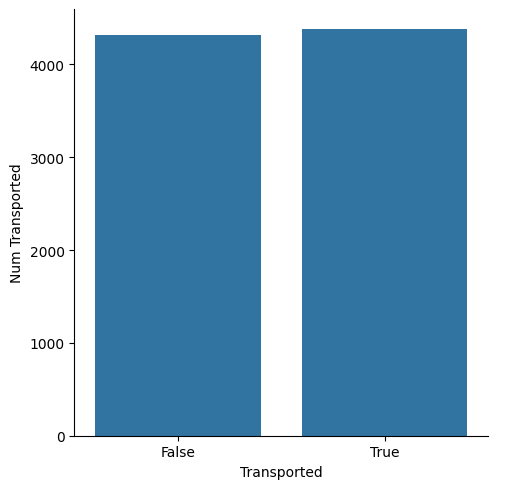

In [8]:
ax = sns.catplot(x = "Transported", data = train_df, kind = "count")
ax.set_axis_labels("Transported", "Num Transported")

<Axes: title={'center': 'VIP'}>

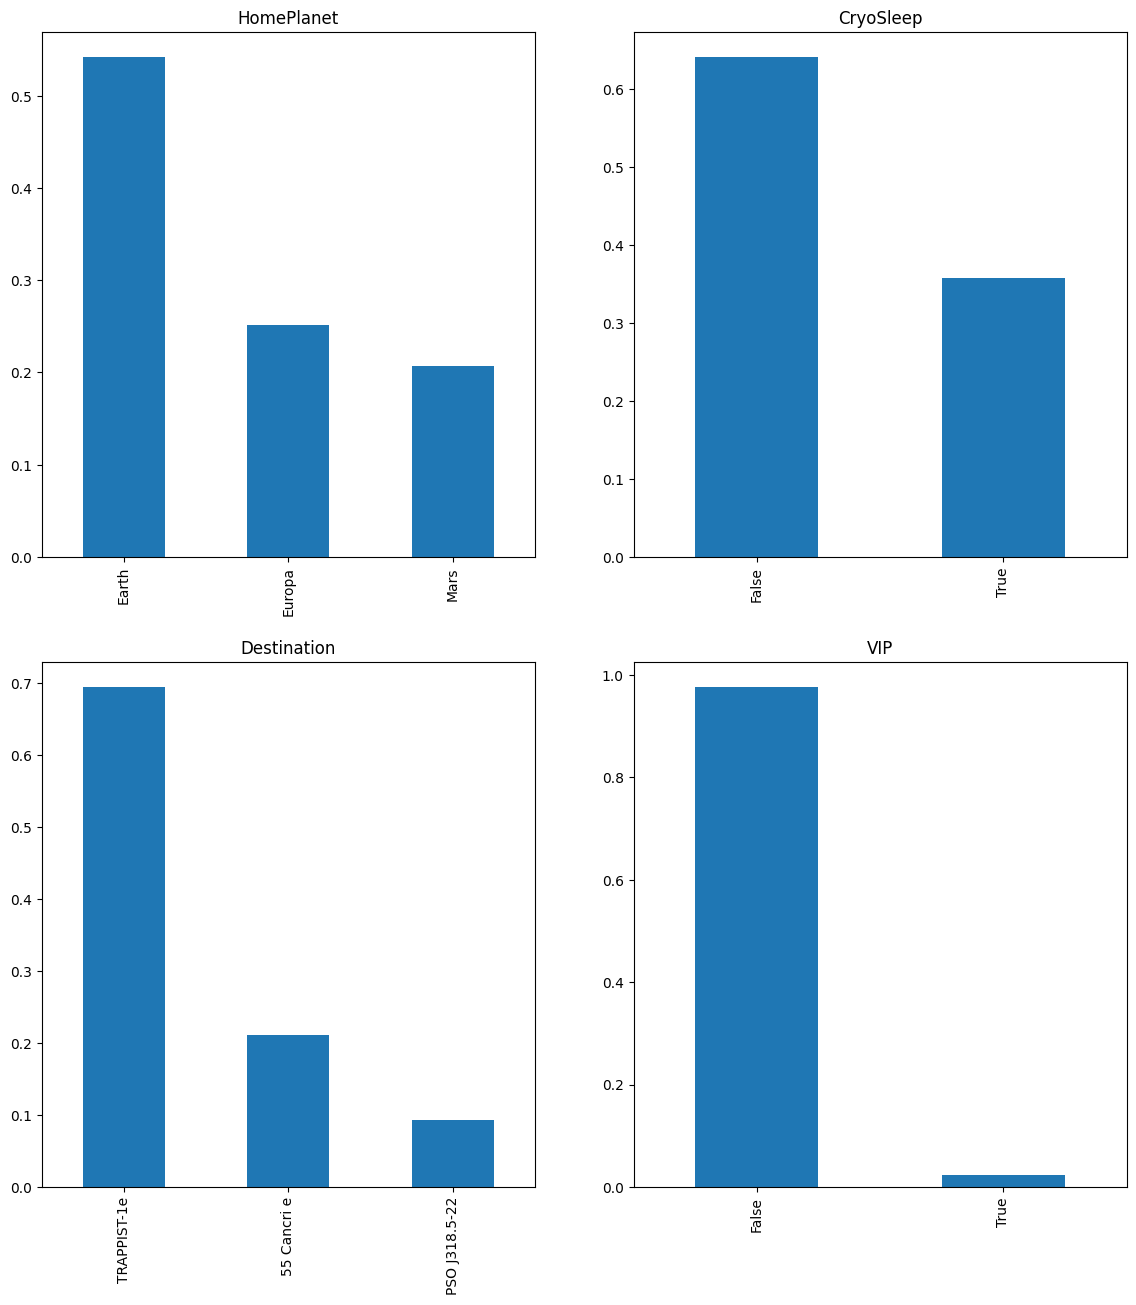

In [9]:
plt.figure(figsize = (14, 15))
plt.subplot(221)
train_df['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(222)
train_df['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(223)
train_df['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(224)
train_df['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

<Axes: title={'center': 'CabinSide'}>

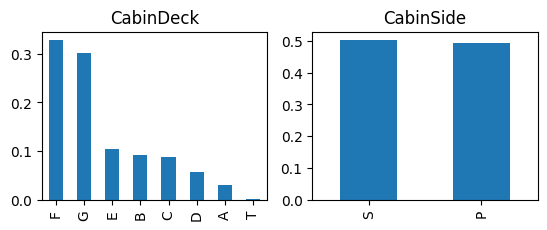

In [10]:
train_df_copy[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df_copy["Cabin"].str.split('/', expand = True)

# Visualize cabin feature
plt.figure()
plt.subplot(221)
train_df_copy['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
train_df_copy['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide')


<ipython-input-11-7636fabb114a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age']);
<ipython-input-11-7636fabb114a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['RoomService']);
<ipython-input-11-7636fabb114a>:8: UserWarning: 

`distplot` is a deprecated function and 

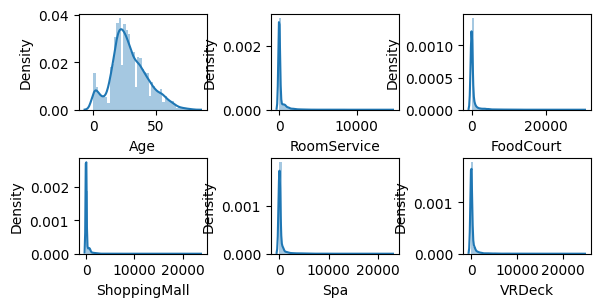

In [11]:
#Numerical data
plt.figure(1)
plt.subplot(331)
sns.distplot(train_df['Age']);
plt.subplot(332)
sns.distplot(train_df['RoomService']);
plt.subplot(333)
sns.distplot(train_df['FoodCourt']);
plt.subplot(334)
sns.distplot(train_df['ShoppingMall']);
plt.subplot(335)
sns.distplot(train_df['Spa']);
plt.subplot(336)
sns.distplot(train_df['VRDeck']);
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

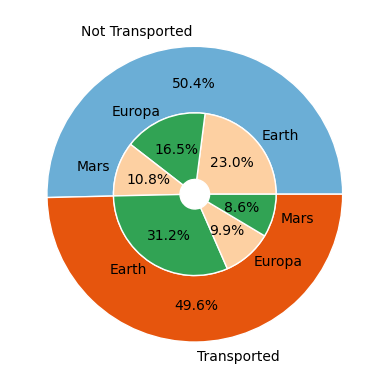

In [12]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people transported or not
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of people transported, by homeplanet
df_trans = train_df.HomePlanet[train_df['Transported']==True].value_counts()

# Counts of people not transported, by homeplanet
df_ntrans = train_df.HomePlanet[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_HomePlanet = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "HomePlanet")
ax.pie(
    df_trans_by_HomePlanet,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Earth','Europa','Mars', 'Earth', 'Europa', 'Mars']
);


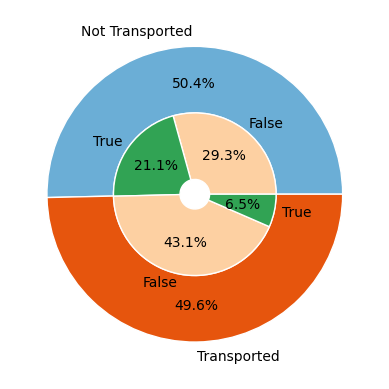

In [13]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people transported or not
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of people transported, by cryosleep
df_trans = train_df.CryoSleep[train_df['Transported']==True].value_counts()

# Counts of people not transported, by cryosleep
df_ntrans = train_df.CryoSleep[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_CryoSleep = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "CrypSleep")
ax.pie(
    df_trans_by_CryoSleep,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['False','True','False', 'True']
);


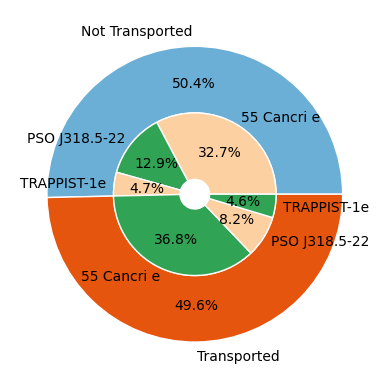

In [14]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people transported or not
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of people transported, by destination
df_trans = train_df.Destination[train_df['Transported']==True].value_counts()

# Counts of people not transported, by destination
df_ntrans = train_df.Destination[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_dest = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "destination")
ax.pie(
    df_trans_by_dest,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['55 Cancri e','PSO J318.5-22','TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
);


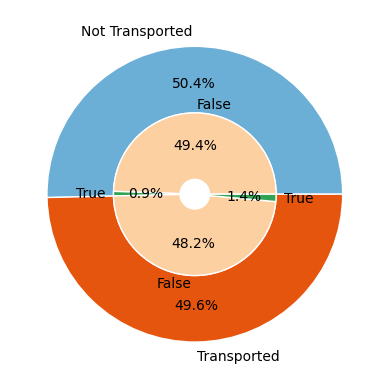

In [15]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people transported or not
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of people transported, by VIP
df_trans = train_df.VIP[train_df['Transported']==True].value_counts()

# Counts of people not transported, by VIP
df_ntrans = train_df.VIP[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_VIP = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "VIP")
ax.pie(
    df_trans_by_VIP,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['False','True','False', 'True']
);


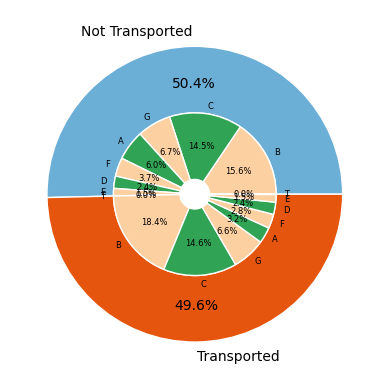

In [16]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of people transported or not
df_tot = train_df['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported','Transported']
);

# Counts of people transported by cabindeck
df_trans = train_df_copy.CabinDeck[train_df['Transported']==True].value_counts()

# Counts of people not transported, by cabindeck
df_ntrans = train_df_copy.CabinDeck[train_df['Transported']==False].value_counts()

# Concatenate arrays, for use in inner pie chart
df_trans_by_CabinDeck = np.concatenate((np.array(df_trans),np.array(df_ntrans)))

# Inner pie chart (to show sub-distribution of "cabin deck")
ax.pie(
    df_trans_by_CabinDeck,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['B','C','G','A','F','D','E','T','B','C','G','A','F','D','E','T'],
    textprops = {'fontsize':6}
);



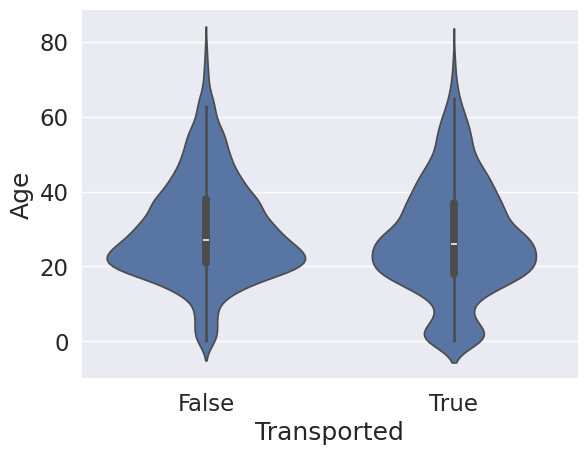

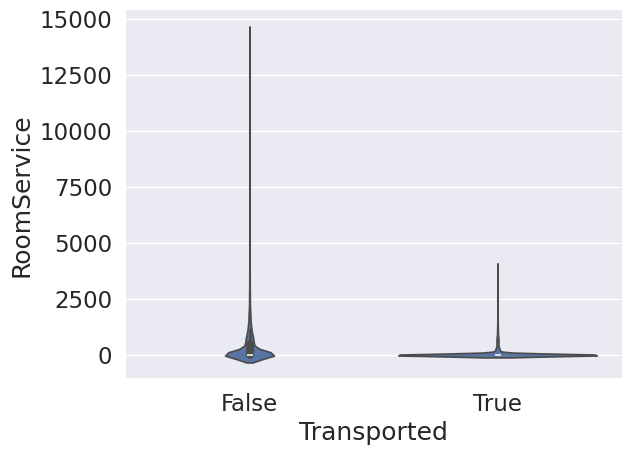

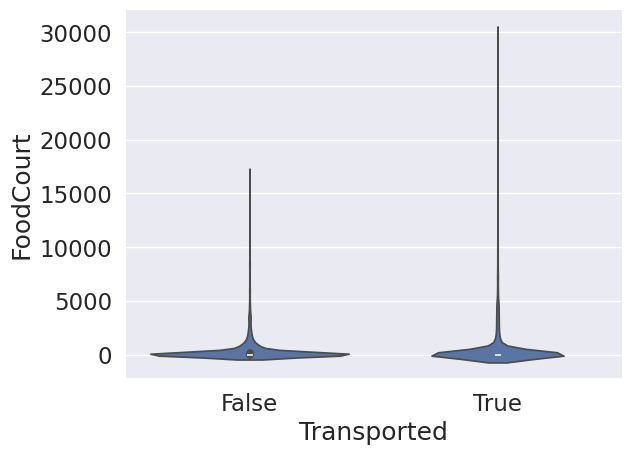

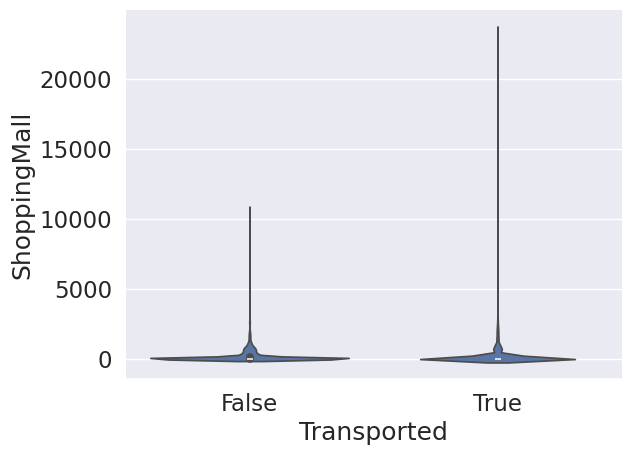

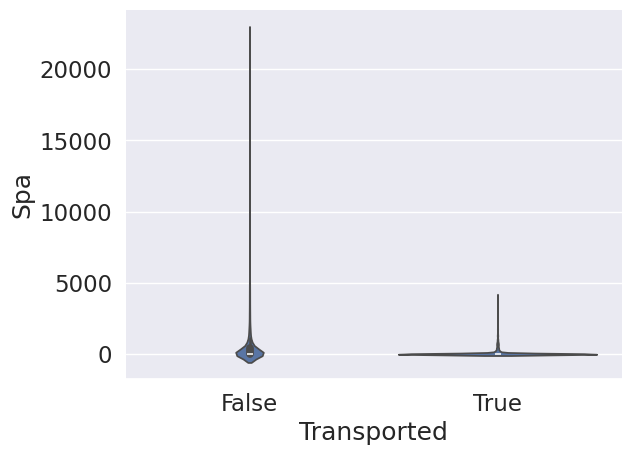

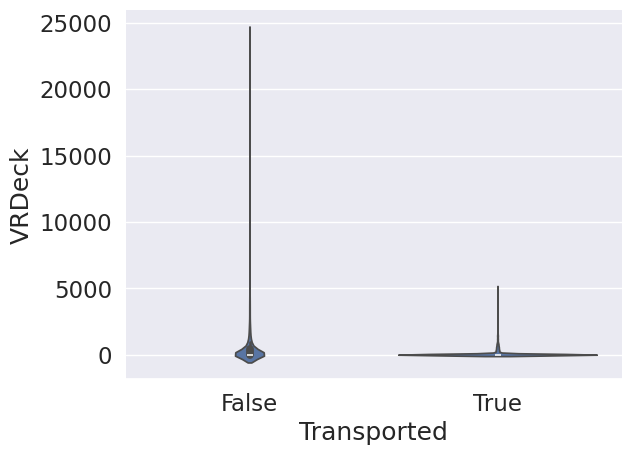

In [17]:
#numerical bivariate analysis
plt.figure()
sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'Age')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'RoomService')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'FoodCourt')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'ShoppingMall')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'Spa')
sns.despine(left = True)
plt.show()

sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'VRDeck')
sns.despine(left = True)

plt.show()

# Pre-Processing

In [18]:
train_copy_2 = train_df_copy.copy()
train_copy_2 = train_copy_2.drop(['CabinDeck', 'CabinSide', 'CabinNo.'], axis = 1)


In [19]:
train_data_1 = train_copy_2.drop(['Transported'], axis = 1)


In [20]:
data = pd.concat([train_data_1, test_df], axis=0).reset_index(drop= True)


In [21]:
#dealing outliers
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
  df = dataframe.copy()
  if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
  for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
  return df

data = clipping_quantile(data, None, 0.99)
print(data.head(3))


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy  
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines  
2         43.0     3576.0           0.0  5435.9    49.0    Altark Susent  


In [22]:
print(f"Column names: {list(data.columns)} \n")

print(f"data shape: {data.shape} \n")

print(f"data columns datatypes: {data.dtypes} \n")

print(f"missing values: {data.isnull().sum()} \n")

#Filling Numerical NANs
def fill_missing_values_numerical(column_names):
    for column in column_names:
        data[column].fillna(data[column].mean(), inplace=True)


columns_to_fill = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]  # Add other column names here
fill_missing_values_numerical(columns_to_fill)

#Filling Categorical NANs
def fill_missing_values_categorical(column_names):
    for column in column_names:
        data[column].fillna(data[column].mode()[0], inplace=True)

columns_to_fill = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']  # Add other column names here
fill_missing_values_categorical(columns_to_fill)

print(f"missing values: {data.isnull().sum()} \n")



Column names: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'] 

data shape: (12970, 13) 

data columns datatypes: PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object 

missing values: PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64 

missing values: PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomServi

In [23]:
def extract_features(df):
    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]

    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"]
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']

    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])

    return df

data_copy = data.copy()
data_model = extract_features(data_copy)
print(data_model.head(3))

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  5435.9    49.0    Altark Susent   

  CabinDeck DeckPosition CabinSide  Regular  Luxury  TotalSpendings  \
0         B        Lower         P      0.0     0.0             0.0   
1         F       Higher         S     34.0   702.0           736.0   
2         A        Lower         S   3576.0  5527.9          9103.9   

   DeckAverageSpent  
0       2445.597734  
1        993.501561  
2       3031.916469  


In [24]:
irrelevant_columns = ["Cabin","Name"]
data_model = data_model.drop(irrelevant_columns, axis = 1)
print(f"data columns datatypes: {data_model.dtypes} \n")

data columns datatypes: PassengerId          object
HomePlanet           object
CryoSleep              bool
Destination          object
Age                 float64
VIP                    bool
RoomService         float64
FoodCourt           float64
ShoppingMall        float64
Spa                 float64
VRDeck              float64
CabinDeck            object
DeckPosition         object
CabinSide            object
Regular             float64
Luxury              float64
TotalSpendings      float64
DeckAverageSpent    float64
dtype: object 



In [25]:
#Categorical One-Hot Encoding
data_model = pd.get_dummies(data_model, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide'])

#Ordinal Encoding
for col in ['CabinDeck', 'DeckPosition']:
    data_model[col], _ = data_model[col].factorize()

In [26]:
train_data_model = data_model.loc[:train_df.index.max(),  :].copy()
test_data_model = data_model.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

print(f'train_data_model shape: {train_data_model.shape}\n')
print(f'test_data_model shape: {test_data_model.shape}\n')

train_data_model shape: (8693, 25)

test_data_model shape: (4277, 25)



# Model Selection and Training

In [27]:
x = train_data_model.copy()
target = train_df['Transported']
# save target variable in in y
y = target.astype(int)
print(x.columns)

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'CabinDeck', 'DeckPosition', 'Regular', 'Luxury',
       'TotalSpendings', 'DeckAverageSpent', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'CabinSide_P', 'CabinSide_S'],
      dtype='object')


In [28]:
from sklearn.feature_selection import SelectKBest, chi2

chi_selector = SelectKBest(chi2, k = 22).fit(x, y)

chi_support = chi_selector.get_support()
chi_feature = x.loc[:, chi_support].columns
chi_feature

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'DeckPosition', 'Regular', 'Luxury', 'TotalSpendings',
       'DeckAverageSpent', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'VIP_True',
       'CabinSide_P', 'CabinSide_S'],
      dtype='object')

In [29]:
from sklearn.ensemble import RandomForestClassifier

x = x[chi_feature]

# baseline model
baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(x, y)

RandomForestClassifier(random_state=1)

In [30]:
from sklearn.model_selection import cross_val_score

# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, x, y, cv = 20, scoring = "accuracy")

# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

0.778332009110652
0.03581223350089199


# Model Evaluation and Improvement

In [31]:
from sklearn.model_selection import cross_val_score

# finding accuracy of baseline model prediction
result = cross_val_score(baseline_model, x, y, cv = 20, scoring = "accuracy")

# print mean accuracy of of baseline model
print(np.mean(result))

0.778332009110652


In [ ]:
from sklearn.model_selection import GridSearchCV

# provide range for max_depth from 1 to 20 with an interval of 2
# provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the grid search model
grid_search.fit(x, y)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=161, random_state=1)

In [32]:
# build final model with these optimized values
model_final = RandomForestClassifier(max_depth=5, n_estimators=161, random_state=1)

# fit model on X and y
model_final.fit(x, y)

RandomForestClassifier(max_depth=5, n_estimators=161, random_state=1)

In [33]:
#Finding accuracy after adjusting hyperparameters
result1 = cross_val_score(model_final, x, y, cv = 20, scoring = "accuracy")

#Finding mean accuracy of the final model
print(np.mean(result1))

0.7945558557126966


In [ ]:
prediction = model_final.predict(test_data_model[chi_feature])

In [ ]:
# store predictions in a dataframe
pred_dict = {"PassengerId" : test_df["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)

# replacing 0 with False and 1 with True
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})
print(pred_df.head(5))

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


# Explainable AI

In [ ]:
!pip install eli5
import eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=e95a6e48622e325e9ab0808ee8035d4a61a07b35d38fb9b842e1d4089c4a7208
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
from eli5.sklearn import PermutationImportance

#Permutation Importance for xai
perm = PermutationImportance(model_final).fit(x,y)
eli5.show_weights(perm, feature_names = list(x.columns))

Weight,Feature
0.0470 ± 0.0061,Luxury
0.0332 ± 0.0036,Regular
0.0081 ± 0.0007,FoodCourt
0.0037 ± 0.0014,RoomService
0.0030 ± 0.0016,Spa
0.0020 ± 0.0012,DeckAverageSpent
0.0016 ± 0.0014,VRDeck
0.0015 ± 0.0024,TotalSpendings
0.0012 ± 0.0007,CabinSide_S
0.0012 ± 0.0006,CryoSleep_True
